In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg

## Задание №6

##### 1. Решите линейную систему

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

##### 2. Найдите псевдорешение

In [4]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

##### 3. Сколько решений имеет линейная система

In [17]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
print (C)
print(np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001))
print(np.linalg.det(A))

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]
2 3
6.66133814775094e-16


Ранг основной матрицы меньше ранга расширенной матрицы, поэтому 
система не имеет решений

In [42]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 15, 18]])
C = np.concatenate((A,B.T), axis=1)
print (C)
print(np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001))
print(np.linalg.det(A))

[[ 1  2  3 12]
 [ 4  5  6 15]
 [ 7  8  9 18]]
2 2
6.66133814775094e-16


Ранг основной матрицы равен рангу расширенной матрицы, поэтому система имеет бесконечное количество решений

##### 4. Вычислите LU-разложение матрицы

In [56]:
A = np.array([ [1, 2, 3]
              , [2, 16, 21]
              , [4, 28, 73] ])
P, L, U = scipy.linalg.lu(A)

print("det A = ", np.linalg.det(A))
print("P: \n", P)
print("L: \n", L)
print("U: \n", U)

det A =  432.00000000000017
P: 
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L: 
 [[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U: 
 [[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


array([ 3.83796296,  0.59490741, -0.34259259])

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [57]:
B = np.array([4, 10, 7])
np.linalg.solve(A, B)

array([ 3.83796296,  0.59490741, -0.34259259])

##### 5. Найдите нормальное псевдорешение недоопределенной системы

z = x + 2y - 1   
8x + 5y + 2x + 4y -2 = 12  
y = 10x - 10

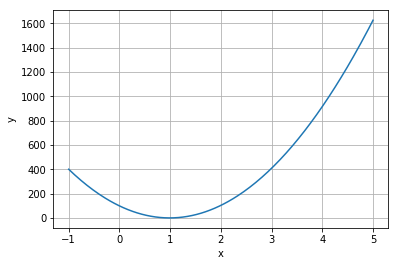

In [62]:
def Q(x, y):
    return (x**2 + y**2)

x = np.linspace(-1, 5, 201)
plt.plot(x, Q(x, 10 * x - 10))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [59]:
A = np.array([[10, 1]])
B = np.array([10])
np.linalg.lstsq(A, B, rcond=None)

(array([0.99009901, 0.0990099 ]),
 array([], dtype=float64),
 1,
 array([10.04987562]))

In [60]:
print('x = ', 1)
print('y = ', 0)
print('z = ', (12 + 5 * 0 - 8 * 1) / 2)

x =  1
y =  0
z =  2.0


##### 6. Найдите одно из псевдорешений вырожденной системы

In [63]:
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[ -8.1240384   -9.6011363  -11.07823419]
 [  0.           0.90453403   1.80906807]
 [  0.           0.           0.        ]]


In [64]:
print(np.dot(Q, R))
print(np.dot(np.transpose(Q), Q))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -1.66533454e-16 -5.55111512e-17]
 [-1.66533454e-16  1.00000000e+00 -2.77555756e-16]
 [-5.55111512e-17 -2.77555756e-16  1.00000000e+00]]


In [65]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [66]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  1.33226763e-15])

In [67]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 1.47287728e-15])

In [68]:
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 1.47287728e-15 0.00000000e+00]


1.499999999999999